# Building and analysing Financial Reports with Python

In this Notebook, I gonna showcase how to build and analyse the raw data in the financial report like balance sheet and income statement and analyse the company's operating situation by calculating their financial ratio.

Key Steps and Key skills involved in this notebook:
1. Merged data from balance sheet and income statement (Data Manipulation and Transformation)
2. Calculate the key financial ratio (Data Aggregation and Analytics)
3. Visualize the regression relationship between financial ratios (Data Visualisation)

## 1. Merge data from balance sheet and income statement (Data Manipulation and Transformation)
After reading financial reports from excel files to dataframe, I will merge the data from balance sheet and income statemetn on "Year", "company" and "comp_type" (company type, can be seen as industry of the company).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")
print(balance_sheet.info())
print(income_statement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [3]:
# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])
print(df_ratios.head())

   Unnamed: 0_x  Year  ...    Total Liab Total Stockholder Equity
0             0  2019  ...  248028000000              90488000000
1             1  2020  ...  258549000000              65339000000
2             2  2021  ...  287912000000              63090000000
3             3  2022  ...  302083000000              50672000000
4             4  2019  ...  184226000000             102330000000

[5 rows x 20 columns]


In [7]:
# Keep only the essential columns in the dataframe
df_ratios = df_ratios[[ 'Year', 'comp_type', 'company', 'Cost Of Goods Sold',
       'Gross Profit', 'Operating Income', 'Total Operating Expenses',
       'Total Revenue', 'Accounts Payable', 'Cash',
       'Inventory', 'Property Plant Equipment', 'Short Term Investments',
       'Total Assets', 'Total Current Assets', 'Total Current Liabilities',
       'Total Liab', 'Total Stockholder Equity']]
print(df_ratios.head())

   Year comp_type  ...    Total Liab  Total Stockholder Equity
0  2019      tech  ...  248028000000               90488000000
1  2020      tech  ...  258549000000               65339000000
2  2021      tech  ...  287912000000               63090000000
3  2022      tech  ...  302083000000               50672000000
4  2019      tech  ...  184226000000              102330000000

[5 rows x 18 columns]


## 2. Calculate the key financial ratio (Data Aggregation and Analytics)
With the data from both balance sheet and income statement, we can calculate the financial ratios like profitability ratio and leveage rate to messure the financial health of the company.

In [8]:
# 
df_ratios['leverage_ratio'] = df_ratios['Total Liab']/df_ratios['Total Stockholder Equity']
df_ratios['profitability_ratio'] = (df_ratios['Total Revenue']-df_ratios['Cost Of Goods Sold'])/df_ratios['Total Revenue']

In [11]:
# Getting average profitability ratios grouped over company type
df1 = df_ratios.pivot_table(index='comp_type', values='profitability_ratio')
print(df1)
# Finding out the lowest average profitability ratio company type
df2= df1[df1['profitability_ratio'] == df1['profitability_ratio'].min()]
df2 = df2.reset_index()
lowest_profitability = df2['comp_type'].values[0]

print(f'lowest profitabilit company type is :' + lowest_profitability)

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
lowest profitabilit company type is :fmcg


In [12]:
# Getting average ratios grouped over company type
df3 = df_ratios.pivot_table(index='comp_type', values = 'leverage_ratio' )
print(df3)
# Finding out the highest average leverage ratio company type
df4 = df3[df3['leverage_ratio'] == df3['leverage_ratio'].max()]
df4 = df4.reset_index()
highest_leverage = df4['comp_type'].values[0]
print(f'highest leverage_ratio company type is :' + highest_leverage)

           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448
highest leverage_ratio company type is :real_est


## 3. Visualize the regression relationship between financial ratios (Data Visualisation)
Now we know that real estate companies have the highest leverage rate, let's explore the relationship between two financial ratios of this industry by using a regression plot.

<AxesSubplot: xlabel='leverage_ratio', ylabel='profitability_ratio'>

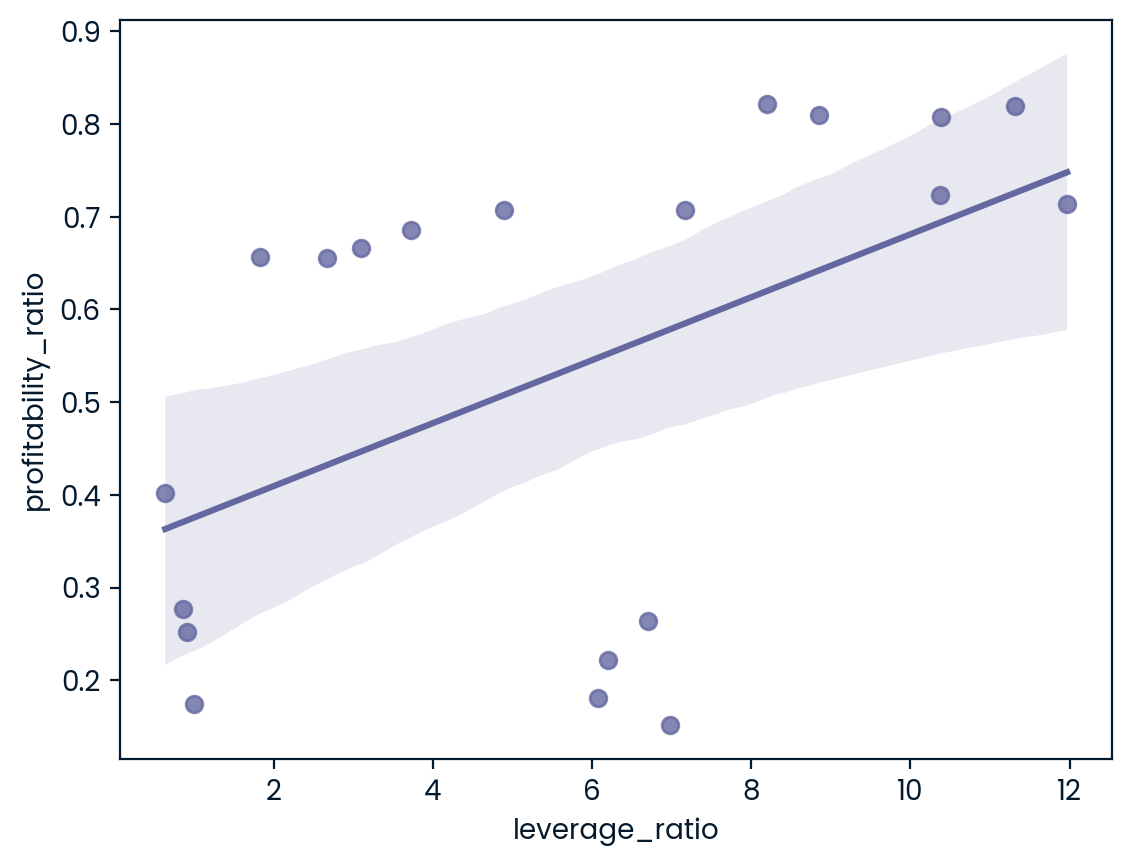

In [58]:
import seaborn as sns
# 
real_est_df = df_ratios[df_ratios['comp_type'] == highest_leverage]
sns.regplot(real_est_df, x='leverage_ratio', y='profitability_ratio')
